In [3]:
#this functions are in the folder /results (add them to your path using sys.path.append() and install if something is missing
import sys
sys.path.insert(1, 'results')

from model import *
from plot_functions import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


In [2]:
#Palettes
#print(sns.color_palette("tab10").as_hex())
#sns.palplot(sns.color_palette("tab10"))
#plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [30]:
###plot heatmaps
   
def hemap(an, stimulation, order, dist_2=False):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        if dist_2==False:
            plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
        elif dist_2==True:
            plt.gca().plot([500, 900], [p_dist2, p_dist2], ls='--', color =ltc, linewidth=lw_t)
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)

## Examples

#### 1st ON close

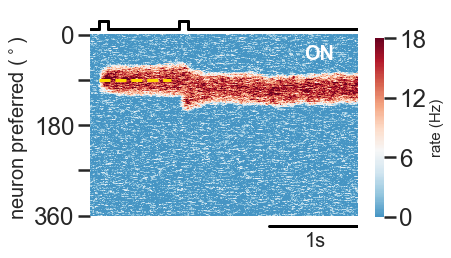

In [8]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

on_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_close_1, stimulation='ON', order=1)
plt.show()


#### 1st OFF close

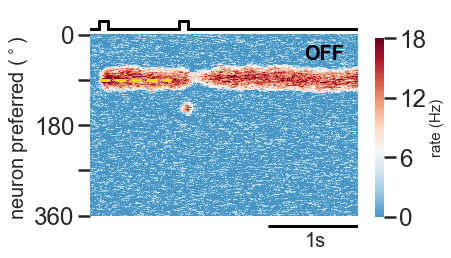

In [12]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

off_close_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(off_close_1, stimulation='OFF', order=1)


#### 1st ON far

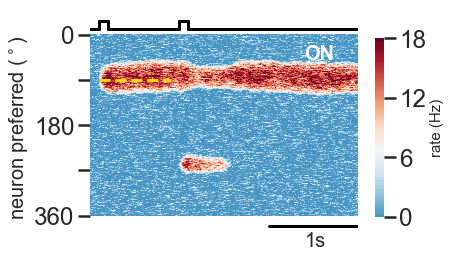

In [13]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'


on_far_1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_far_1, stimulation='ON', order=1)


#### 1st OFF far

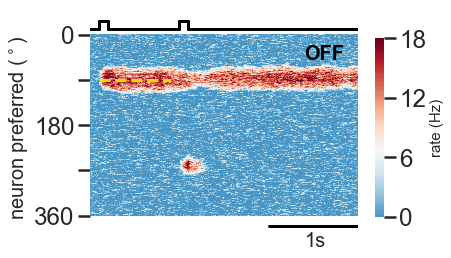

In [14]:
fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'


off_far_1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_far_1, stimulation='OFF', order=1)

In [18]:
fee=1
fei=1
fie=1
fii=1

on_rolled=[]

reps_=10

for n in range(reps_):
    on2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=1.2, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,              
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled.append(PA_on_rolled)

    

on_rolled_mean=np.mean(on_rolled, axis=0)

#####

off_rolled=[]

for n in range(reps_):
    off2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,  k_noise=0.5,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled.append(PA_off_rolled)

    
    
    
off_rolled_mean=np.mean(off_rolled, axis=0)

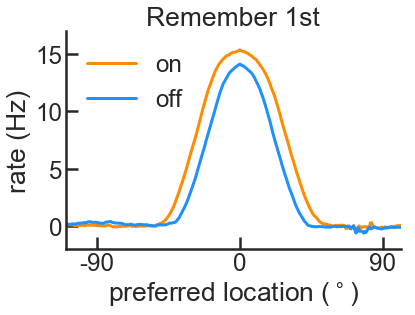

In [19]:
plt.plot(on_rolled_mean, color=c_on,  label='on' )
plt.plot(off_rolled_mean, color= c_off, label='off' )
plt.legend(frameon=False)
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticks([N/4,N/2, 3*N/4])
plt.gca().set_xlim([100, 400])

plt.gca().set_xticklabels(['-90', '0', '90'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
plt.ylim(-2,17);

## R2

#### 2nd ON close

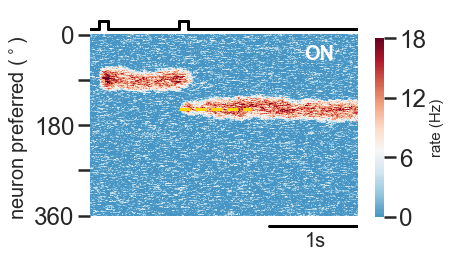

In [116]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


on_close_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_close_2, stimulation='ON', order=2)

#### 2nd OFF close

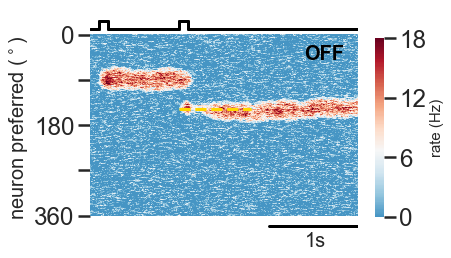

In [115]:
fee=0.94
fii=0.92
fei=1.14
fie=1.08


%config InlineBackend.figure_format = 'png' ## 'svg'


off_close_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fee,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,              
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_close_2, stimulation='OFF', order=2)

#### 2nd ON far

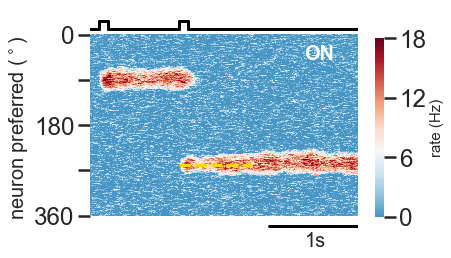

In [32]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'

on_far_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_far_2, stimulation='ON', order=2, dist_2=True)

#### 2nd off far

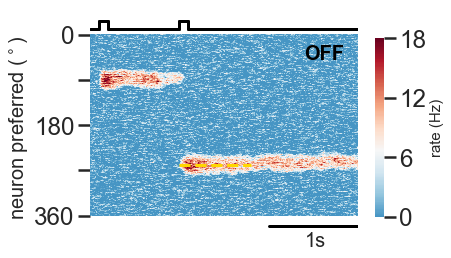

In [42]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'

off_far_2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_far_2, stimulation='OFF', order=2, dist_2=True)

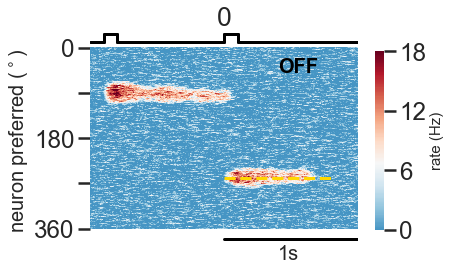

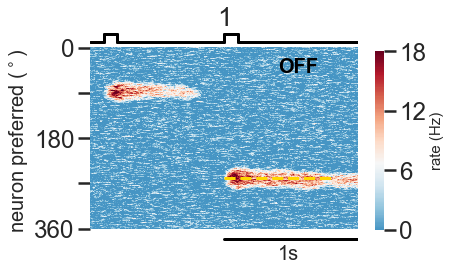

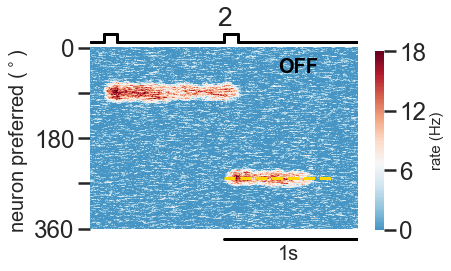

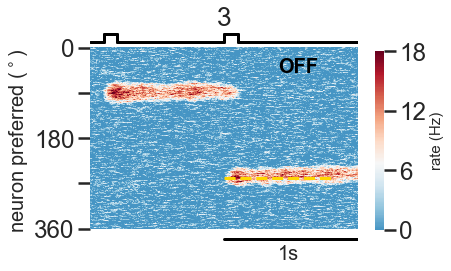

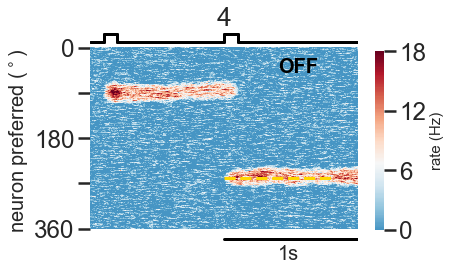

In [43]:
on_rolled_2=[]

reps_=5

for n in range(reps_):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    on2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled_2.append(PA_on_rolled)
    
    

on_rolled2_mean=np.mean(on_rolled_2, axis=0)


#######

off_rolled_2=[]

for n in range(reps_):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    off2= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,              
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled_2.append(PA_off_rolled)
    hemap(off2, stimulation='OFF', order=2, dist_2=True)
    plt.title(str(n))
    plt.show(block=False)
    

off_rolled2_mean=np.mean(off_rolled_2, axis=0)

In [45]:
##get the ones that reach the end of the simulation to compare!
idx_fin=[1,3,4]
off_rolled_2_end = [off_rolled_2[i] for i in idx_fin]
off_rolled2_end_mean=np.mean(off_rolled_2_end, axis=0)

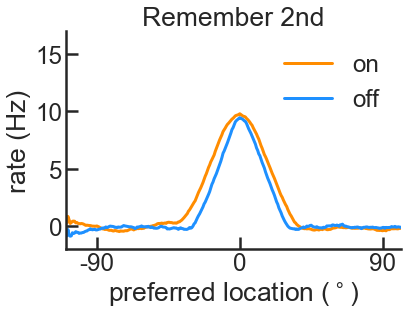

In [46]:
plt.plot(on_rolled2_mean, color=c_on,  label='on' )
plt.plot(off_rolled2_end_mean, color= c_off, label='off' )
plt.legend(frameon=False)
plt.title('Remember 2nd')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticklabels(['-90', '0', '90'], rotation=0)
plt.gca().set_xticks([N/4,N/2, 3*N/4])
plt.gca().set_xlim([100, 400])
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
#r'abs error ($^\circ$)'
plt.ylim(-2,17);

## Simulations

In [67]:
##
err1_on_f = pd.read_excel('results/err1_on_f.xlsx')
err1_off_f = pd.read_excel('results/err1_off_f.xlsx') 

err1_on_c = pd.read_excel('results/err1_on_c.xlsx') 
err1_off_c = pd.read_excel('results/err1_off_c.xlsx')

err2_on_f = pd.read_excel('results/err2_on_f.xlsx')
err2_off_f = pd.read_excel('results/err2_off_f.xlsx')

err2_on_c = pd.read_excel('results/err2_on_c.xlsx')
err2_off_c = pd.read_excel('results/err2_off_c.xlsx')

In [68]:
#### mirrror to get rid of the asimetry

err1_on_fd = err1_on_f.copy()
err1_on_fd['err'] = err1_on_fd['err']*-1
err1_on_f = pd.concat([err1_on_f, err1_on_fd])

#
err1_off_fd = err1_off_f.copy()
err1_off_fd['err'] = err1_off_fd['err']*-1
err1_off_f = pd.concat([err1_off_f, err1_off_fd])

#
err1_on_cd = err1_on_c.copy()
err1_on_cd['err'] = err1_on_cd['err']*-1
err1_on_c = pd.concat([err1_on_c, err1_on_cd])

#
err1_off_cd = err1_off_c.copy()
err1_off_cd['err'] = err1_off_cd['err']*-1
err1_off_c = pd.concat([err1_off_c, err1_off_cd])

#
err2_on_fd = err2_on_f.copy()
err2_on_fd['err'] = err2_on_fd['err']*-1
err2_on_f = pd.concat([err2_on_f, err2_on_fd])

#
err2_off_fd = err2_off_f.copy()
err2_off_fd['err'] = err2_off_fd['err']*-1
err2_off_f = pd.concat([err2_off_f, err2_off_fd])

#
err2_on_cd = err2_on_c.copy()
err2_on_cd['err'] = err2_on_cd['err']*-1
err2_on_c = pd.concat([err2_on_c, err2_on_cd])

#
err2_off_cd = err2_off_c.copy()
err2_off_cd['err'] = err2_off_cd['err']*-1
err2_off_c = pd.concat([err2_off_c, err2_off_cd])



## R1 (remember first)

In [69]:
#outlier_lim=50
#outlier_lim=150

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


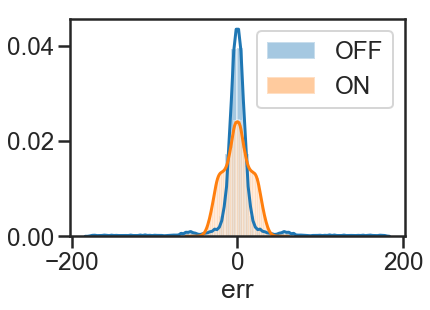

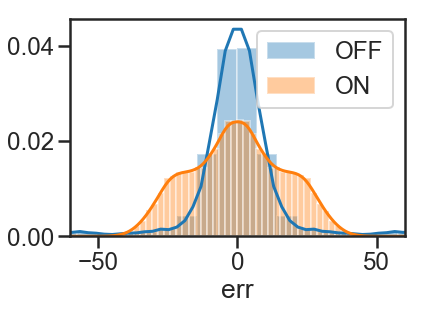

14.115109000000002 13.723072999999998
8.40973187791437 13.723072999999998


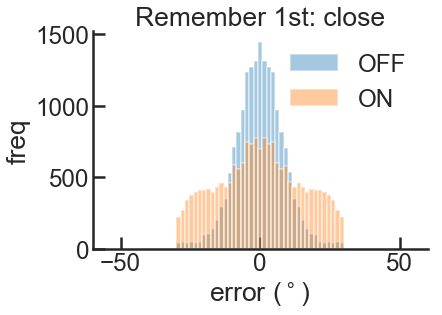

In [70]:
outlier_lim=60

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.show()

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())


err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']< outlier_lim] #err1_off_c['abs_err'].mean() + 2*err1_off_c['abs_err'].std()]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]


print(err1_off_c_o.abs_err.mean(), err1_on_c_o.abs_err.mean())

sns.distplot(err1_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err1_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


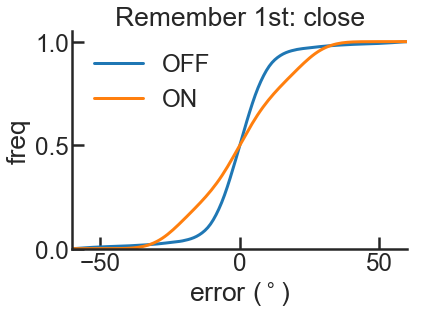

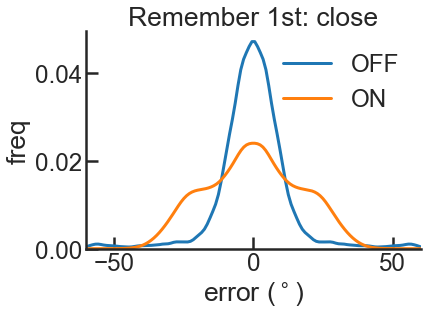

In [71]:
##%config InlineBackend.figure_format = 'svg' ## 'svg'

err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']< outlier_lim] #err1_off_c['abs_err'].mean() + 2*err1_off_c['abs_err'].std()]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]

sns.distplot(err1_off_c_o.err, label='OFF',  hist=False, bins=np.linspace(-100,100,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':3})
sns.distplot(err1_on_c_o.err, label='ON', hist=False,  bins=np.linspace(-100,100,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':3})
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

sns.distplot(err1_off_c_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err1_on_c_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

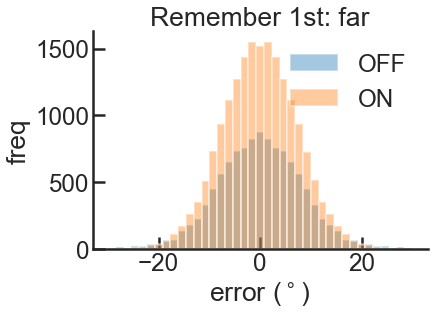

7.552850368809271 5.824892841834547


In [72]:
outlier_lim=60 #90 antes

from scipy.stats import norm

# sns.distplot(err1_off_f.err, label='OFF')
# sns.distplot(err1_on_f.err, label='ON')
# plt.legend()
# plt.show()
# print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

err1_off_f_o = err1_off_f.loc[ err1_off_f['abs_err']< outlier_lim] #err1_off_f['abs_err'].mean() + 2*err1_off_f['abs_err'].std()]
err1_on_f_o = err1_on_f.loc[err1_on_f['abs_err']< outlier_lim ] #err1_on_f['abs_err'].mean() + 2*err1_on_f['abs_err'].std()]

sns.distplot(err1_off_f_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40) )
sns.distplot(err1_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40)  ) #, fit=norm, fit_kws={"color":"orange"}

plt.legend( frameon=False)
#plt.xlim(-45,45)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
#plt.ylim(-0.01, 0.08)
plt.show()

print(err1_off_f_o.abs_err.mean(), err1_on_f_o.abs_err.mean())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


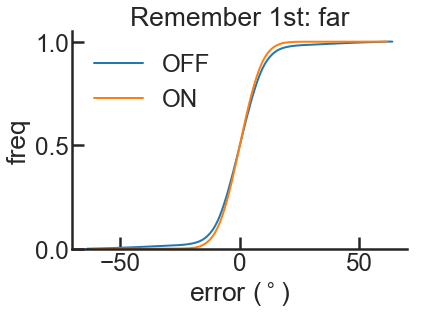

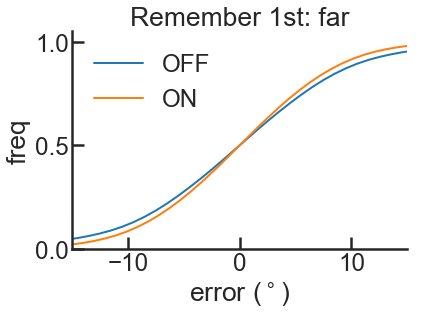

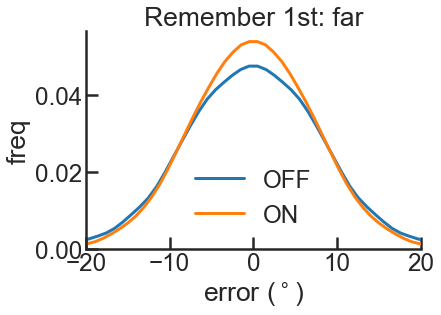

In [73]:
%config InlineBackend.figure_format = 'png' ## 'svg'



sns.distplot(err1_off_f_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':2})
sns.distplot(err1_on_f_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':2})
plt.legend( frameon=False)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
#plt.ylim(-0.01, 0.08)
plt.xlim(-70,70)

plt.show()




sns.distplot(err1_off_f_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':2})
sns.distplot(err1_on_f_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':2})
plt.legend( frameon=False)
plt.xlim(-15,15)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
#plt.ylim(-0.01, 0.08)
plt.show()


sns.distplot(err1_off_f_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err1_on_f_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-20,20)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


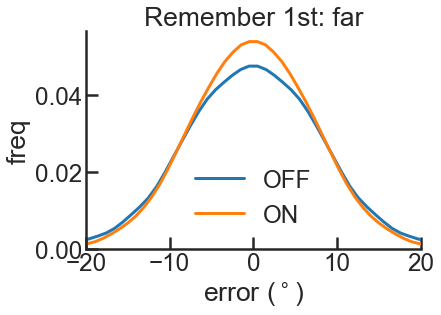

In [74]:
err1_off_f_o=pd.read_excel('results/1_off_f.xlsx') ##without outliers
err1_on_f_o=pd.read_excel('results/1_on_f.xlsx') ##without outliers

sns.distplot(err1_off_f_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err1_on_f_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-20,20)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


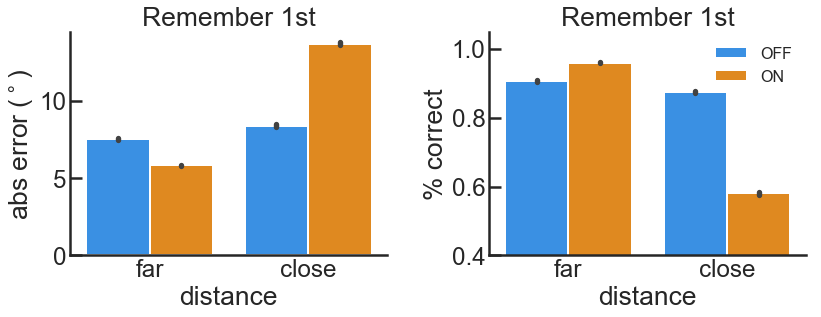

In [75]:
%config InlineBackend.figure_format = 'png' ## 'svg'

first = pd.concat([err1_on_c_o, err1_off_c_o,err1_on_f_o, err1_off_f_o ])
first['performance']=first['abs_err']<15

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 1st')
#ax1.set_ylim(2,6)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
#ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 1st')
ax2.set_ylim(0.4, 1.05)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

## R2

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


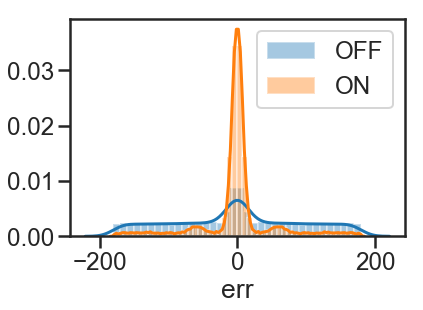

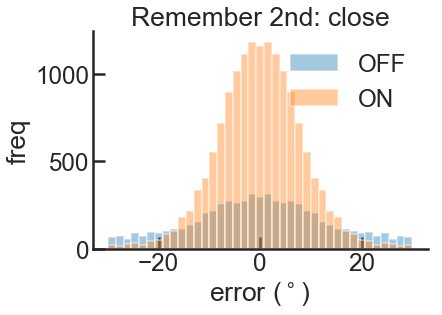

21.38442929404003 9.808686783343392


In [76]:

outlier_lim=60


sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
#plt.xlim(-30,30)
plt.show()
err2_on_c_o = err2_on_c.loc[err2_on_c['abs_err']< outlier_lim] # err2_on_c['abs_err'].mean()+ 2*err2_on_c['abs_err'].std()]
err2_off_c_o = err2_off_c.loc[err2_off_c['abs_err']< outlier_lim ]# err2_off_c['abs_err'].mean() + 2*err2_off_c['abs_err'].std()]

sns.distplot(err2_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err2_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
#plt.xlim(-30,30)
plt.title('Remember 2nd: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()


#print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

print(err2_off_c_o.abs_err.mean(), err2_on_c_o.abs_err.mean())


##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


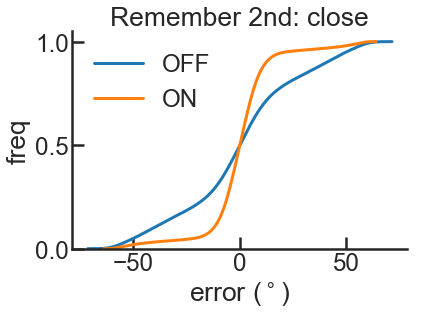

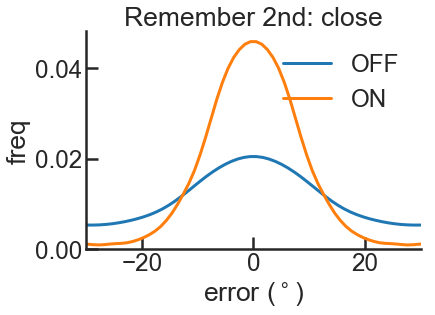

In [77]:
sns.distplot(err2_off_c_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':3})
sns.distplot(err2_on_c_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':3})


plt.legend( frameon=False)
#plt.xlim(-60,60)
plt.title('Remember 2nd: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()


sns.distplot(err2_off_c_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err2_on_c_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('Remember 2nd: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


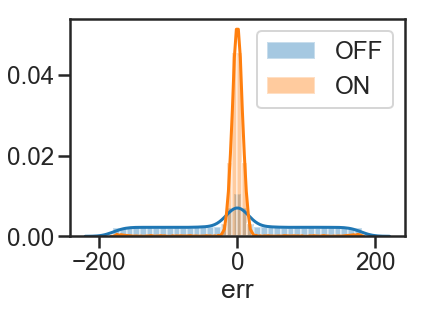

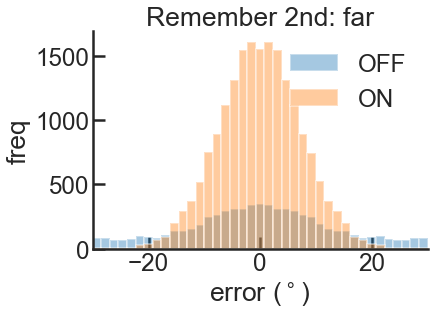

20.602536772543168 6.018570838496489


In [78]:
sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.show()

err2_on_f_o = err2_on_f.loc[err2_on_f['abs_err']< outlier_lim]
err2_off_f_o = err2_off_f.loc[err2_off_f['abs_err']<outlier_lim]

sns.distplot(err2_off_f_o.err, label='OFF', kde=False, bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

print(err2_off_f_o.abs_err.mean(), err2_on_f_o.abs_err.mean())
##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


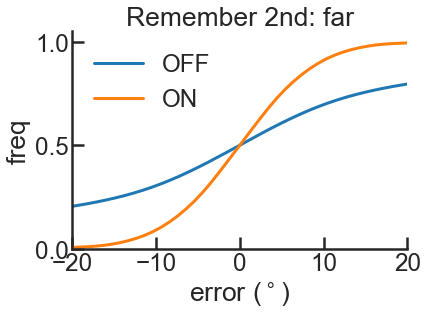

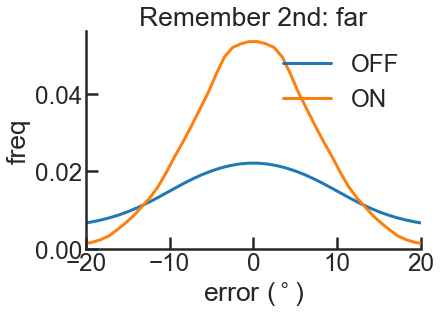

In [79]:

sns.distplot(err2_off_f_o.err, label='OFF',  hist=False, bins=np.linspace(-60,60,40), hist_kws={'cumulative': True }, kde_kws={'cumulative': True, 'linewidth':3})
sns.distplot(err2_on_f_o.err, label='ON', hist=False,  bins=np.linspace(-60,60,40), hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':3})


plt.legend( frameon=False)
#plt.xlim(-100,100)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.xlim(-20,20)
plt.show()


sns.distplot(err2_off_f_o.err, label='OFF', hist=False, kde=True, bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', hist=False, kde=True,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-20,20)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

## Performance summary 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


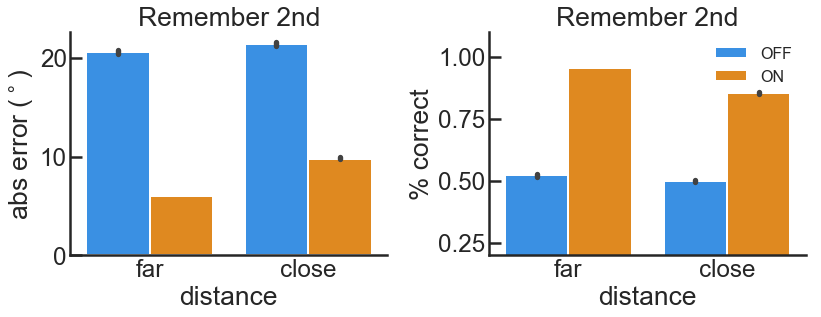

In [80]:
%config InlineBackend.figure_format = 'png' ## 'svg'

second = pd.concat([err2_on_c_o, err2_off_c_o,err2_on_f_o, err2_off_f_o ])
second['performance']=second['abs_err']<15

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
#ax1.set_ylim(2,9)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
ax2.set_ylim(0.4, 1.1)
ax2.set_ylim(0.2, 1.1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()